# 와인 품질(Quality) 분류 경진대회
- 주어진 데이터를 바탕으로 와인 품질을 분류해보세요

## 1. Library

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.style.use('fivethirtyeight')

## 2. 데이터 확인 및 전처리

In [3]:
# Load Data
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

In [4]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [8]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


- index: 구분자
- quality: 품질
- fixed acidity: 산도
- volatile acidity: 휘발성산
- citric acid: 시트르산
- residual sugar: 잔당
- chlorides: 염화물
- free sulfur dioxide: 독립 이산화황
- total sulfur dioxide: 총 이산화황
- density: 밀도
- pH: 수소이온농도
- sulphates: 황산염
- alcohol: 도수
- type: 종류

In [6]:
# drop index column
train = train.drop(['index'], axis=1)
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [7]:
train.shape, test.shape

((5497, 13), (1000, 13))

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


In [10]:
train.describe(include='all')

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4159
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,NaN
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,NaN
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,NaN
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,NaN
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,NaN
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,NaN


## 3. EDA

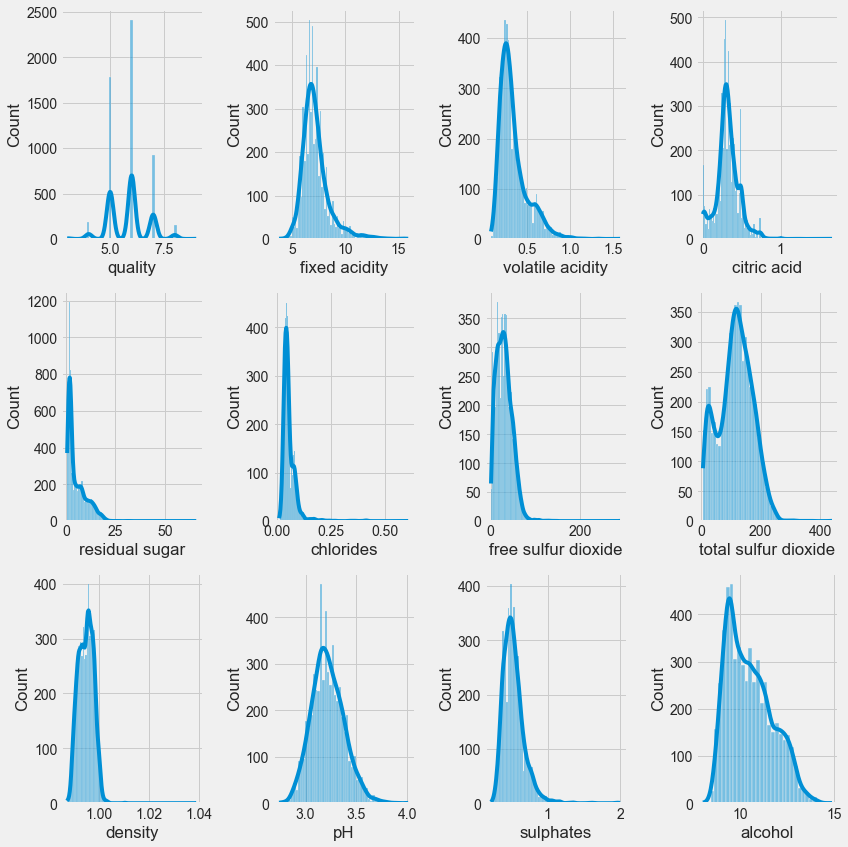

In [30]:
# train의 각 변수별 분포
plt.figure(figsize=[12, 12])
for i in range(1, 13):
    plt.subplot(3, 4, i)
    sns.histplot(train.iloc[:,i-1], kde=True)
plt.tight_layout()
plt.show()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64


Text(0.5, 1.0, 'dist. of type')

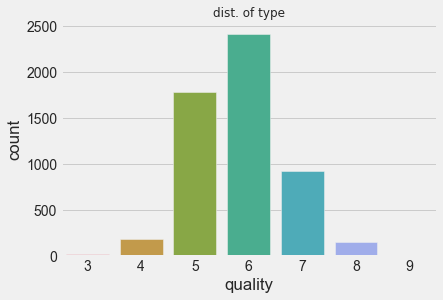

In [31]:
print(train['quality'].value_counts())
sns.countplot(x=train['quality'])
plt.title('dist. of type', fontfamily='DejaVu Sans', fontsize=12)

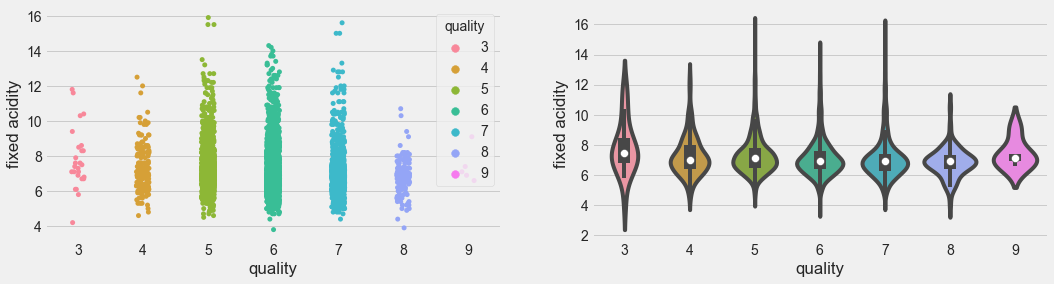

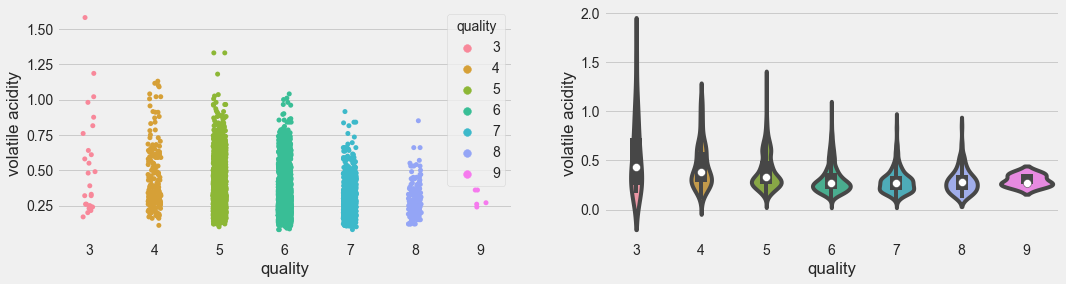

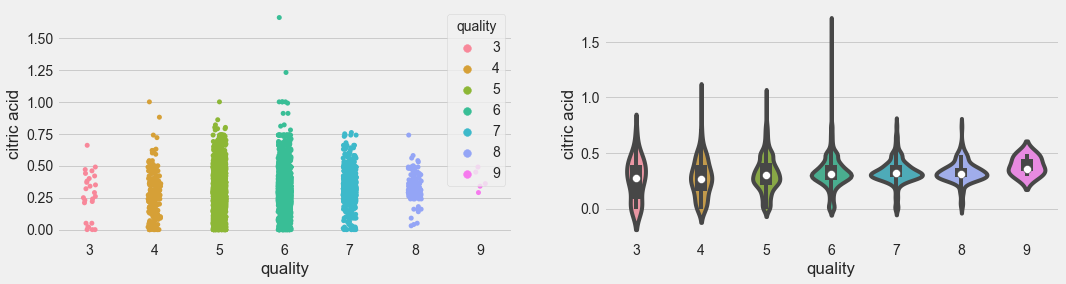

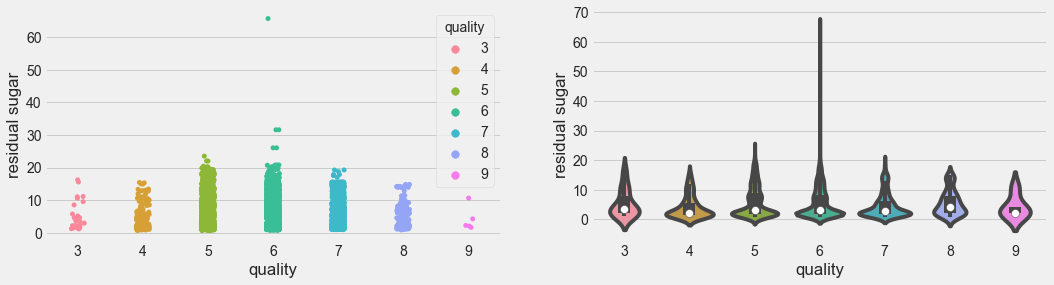

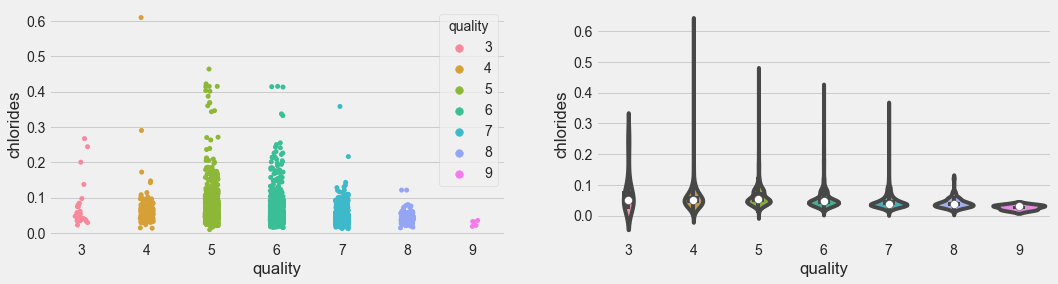

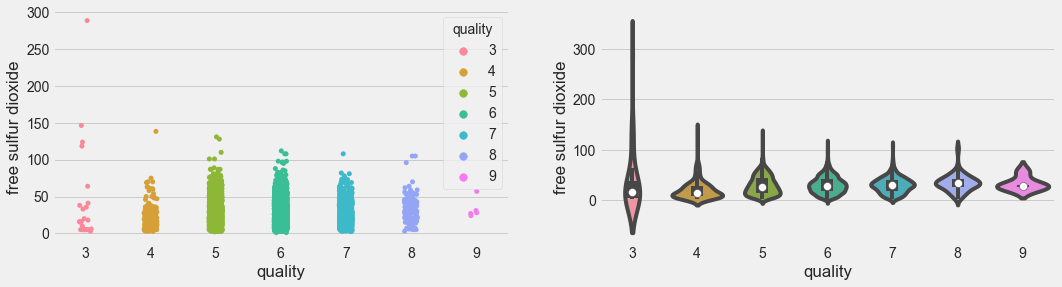

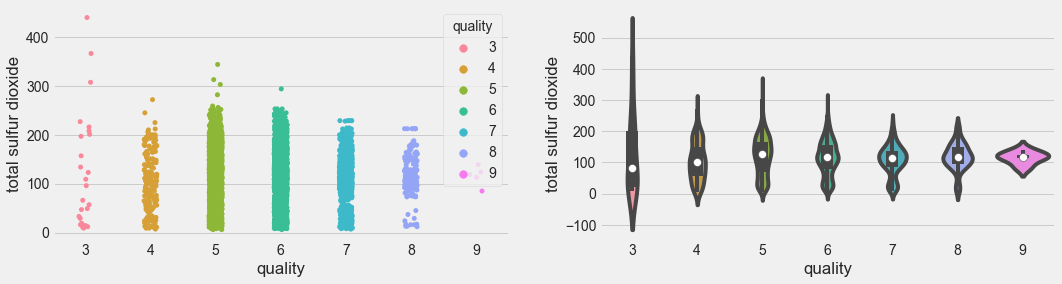

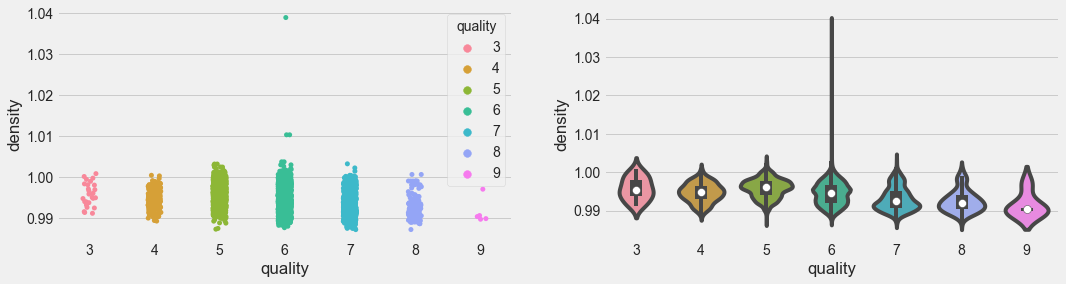

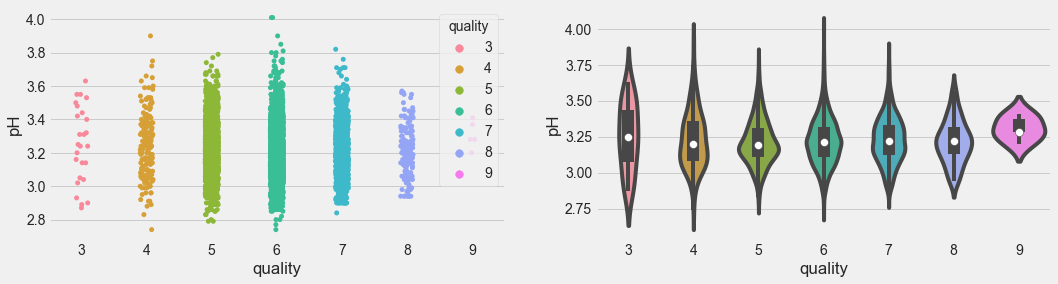

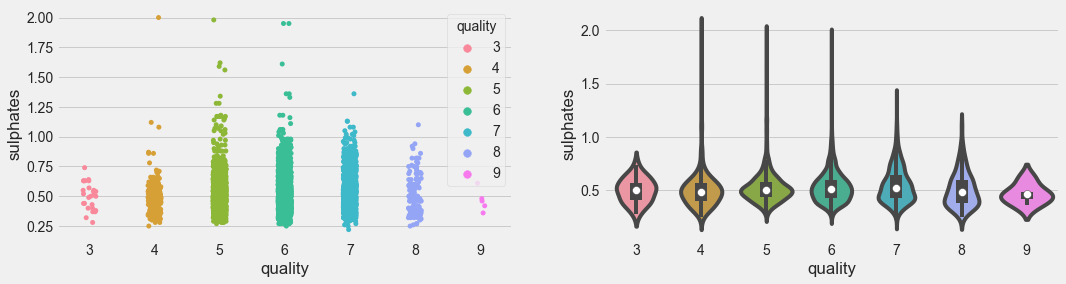

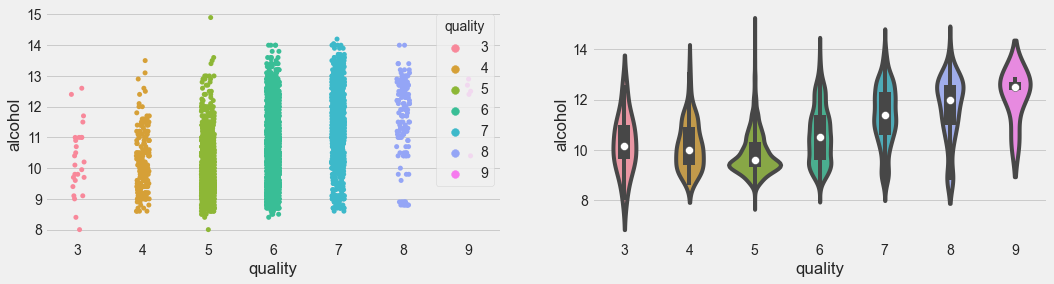

In [32]:
# distribution by 'quality'
numerical_columns = train.select_dtypes(exclude='object').columns.tolist()
numerical_columns.remove('quality')

def show_dist_plot(df, columns):
    for column in columns:
        f, ax = plt.subplots(1, 2, figsize=[16, 4])
        sns.stripplot(data=df, x='quality', y=column, ax=ax[0], hue=df['quality'])
        sns.violinplot(data=df, x='quality', y=column, ax=ax[1])
    
show_dist_plot(train, numerical_columns)

<AxesSubplot:>

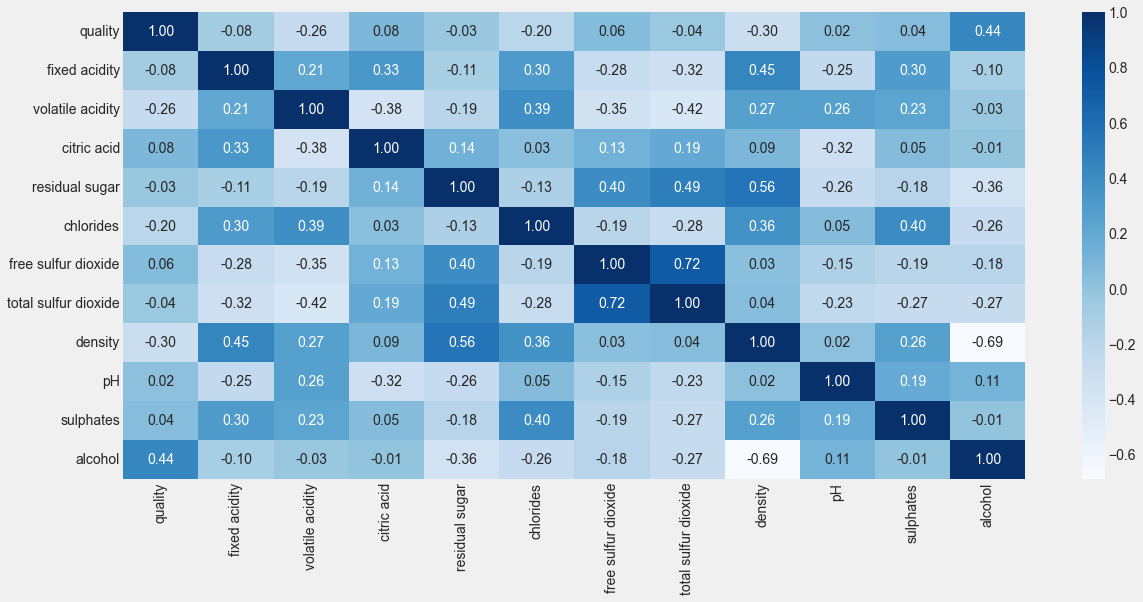

In [33]:
# 상관관계
plt.figure(figsize=[18, 8])
corr = train.corr()
sns.heatmap(corr, annot=True, fmt = '.2f', cmap='Blues')

## 4. Modeling

In [34]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import plot_roc_curve, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [35]:
# StandardScaler: 표준화
ss = StandardScaler()
train[numerical_columns] = ss.fit_transform(train[numerical_columns])

# factorize: type을 0과 1로 변환
train['type'] = pd.factorize(train['type'])[0]

train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,0
1,5,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,1
2,5,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,0
3,6,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,0
4,6,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,0


In [36]:
X = train.drop(['quality'], axis=1)
y = train.quality

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape, X_test.shape

((4397, 12), (1100, 12))

In [40]:
def Model(model):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test, prediction)
    print('Testing Score\n', score)
    plot_confusion_matrix(model, X_test, y_test, cmap='OrRd')

Testing Score
 0.6863636363636364


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


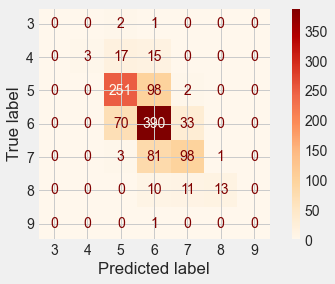

In [41]:
# RandomForest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
Model(rf)

In [42]:
X_train.shape, test.shape

((4397, 12), (1000, 13))

In [43]:
#drop index column
test= test.drop(['index'],axis=1)

#Standardscaler
ss= StandardScaler()
test[numerical_columns] = ss.fit_transform(test[numerical_columns])

#factorize
test['type'] = pd.factorize(test['type'])[0]

test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1.306951,-0.220579,1.098184,0.236865,-0.385503,-1.108531,-0.756734,-0.352060,-1.943080,-1.068114,1.000172,0
1,4.507070,0.477272,1.780836,-0.749722,0.343645,-0.888114,-1.327873,1.915724,-0.949812,-0.311854,-1.203025,1
2,-0.553583,-0.395042,-0.335387,-0.057012,-0.466520,0.709907,1.077835,-0.008456,-0.142782,1.063164,-0.864071,0
3,-0.032634,-1.151046,0.483796,-0.770714,-0.385503,-0.557489,0.731690,-0.008456,1.905833,-0.449356,-0.355641,0
4,-0.330319,-0.511350,-0.403653,-0.728731,-1.033635,-0.419728,-0.774041,-1.516876,-0.329020,-0.449356,1.169649,0


In [44]:
final_pred = rf.predict(test)

In [47]:
# submission
submission['quality'] = final_pred
submission.to_csv('./result/submission.csv', index=False)

In [48]:
submission

,index,quality
0,0,6
1,1,6
2,2,6
3,3,6
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6
